1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

Для решения задачи классификации в качестве целевого признака будем использовать "HeartDisearse". Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.

Импорт библиотек

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

Загрузка данных

In [7]:
original_train = pd.read_csv('heart.csv', sep=",")

In [8]:
train = original_train.drop_duplicates()

2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Основные характеристики датасетов

In [9]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
train.shape

(918, 12)

In [11]:
train.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
train.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [13]:
train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Вывод. Представленный набор данных не содержит пропусков в обучающей выборке.

Построение графиков для понимания структуры данных

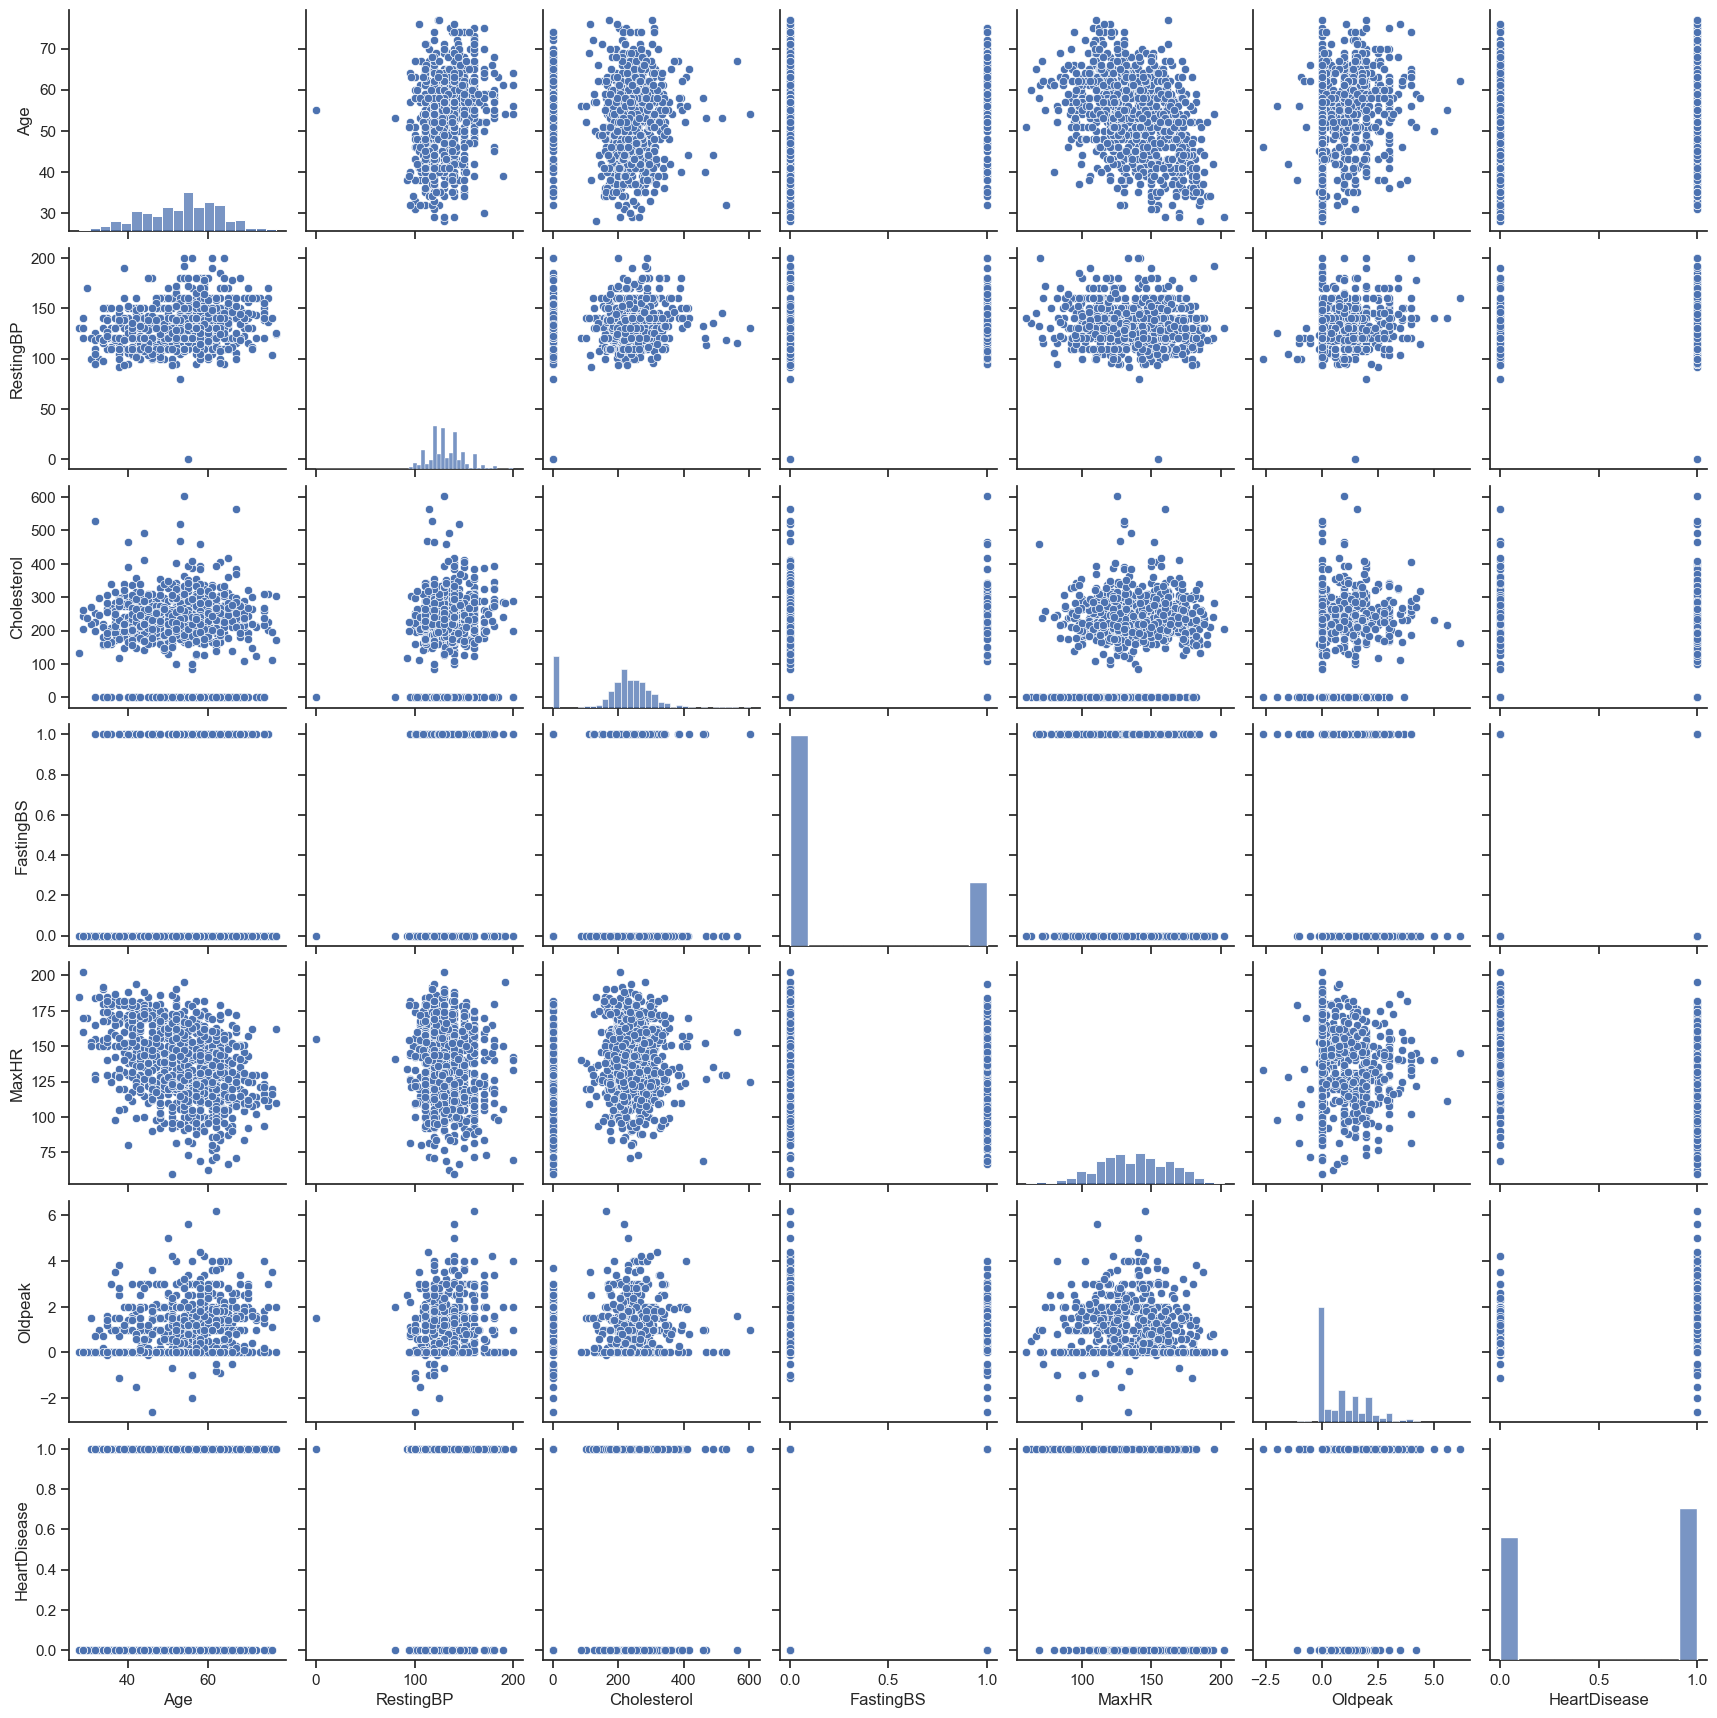

In [14]:
sns.pairplot(train)

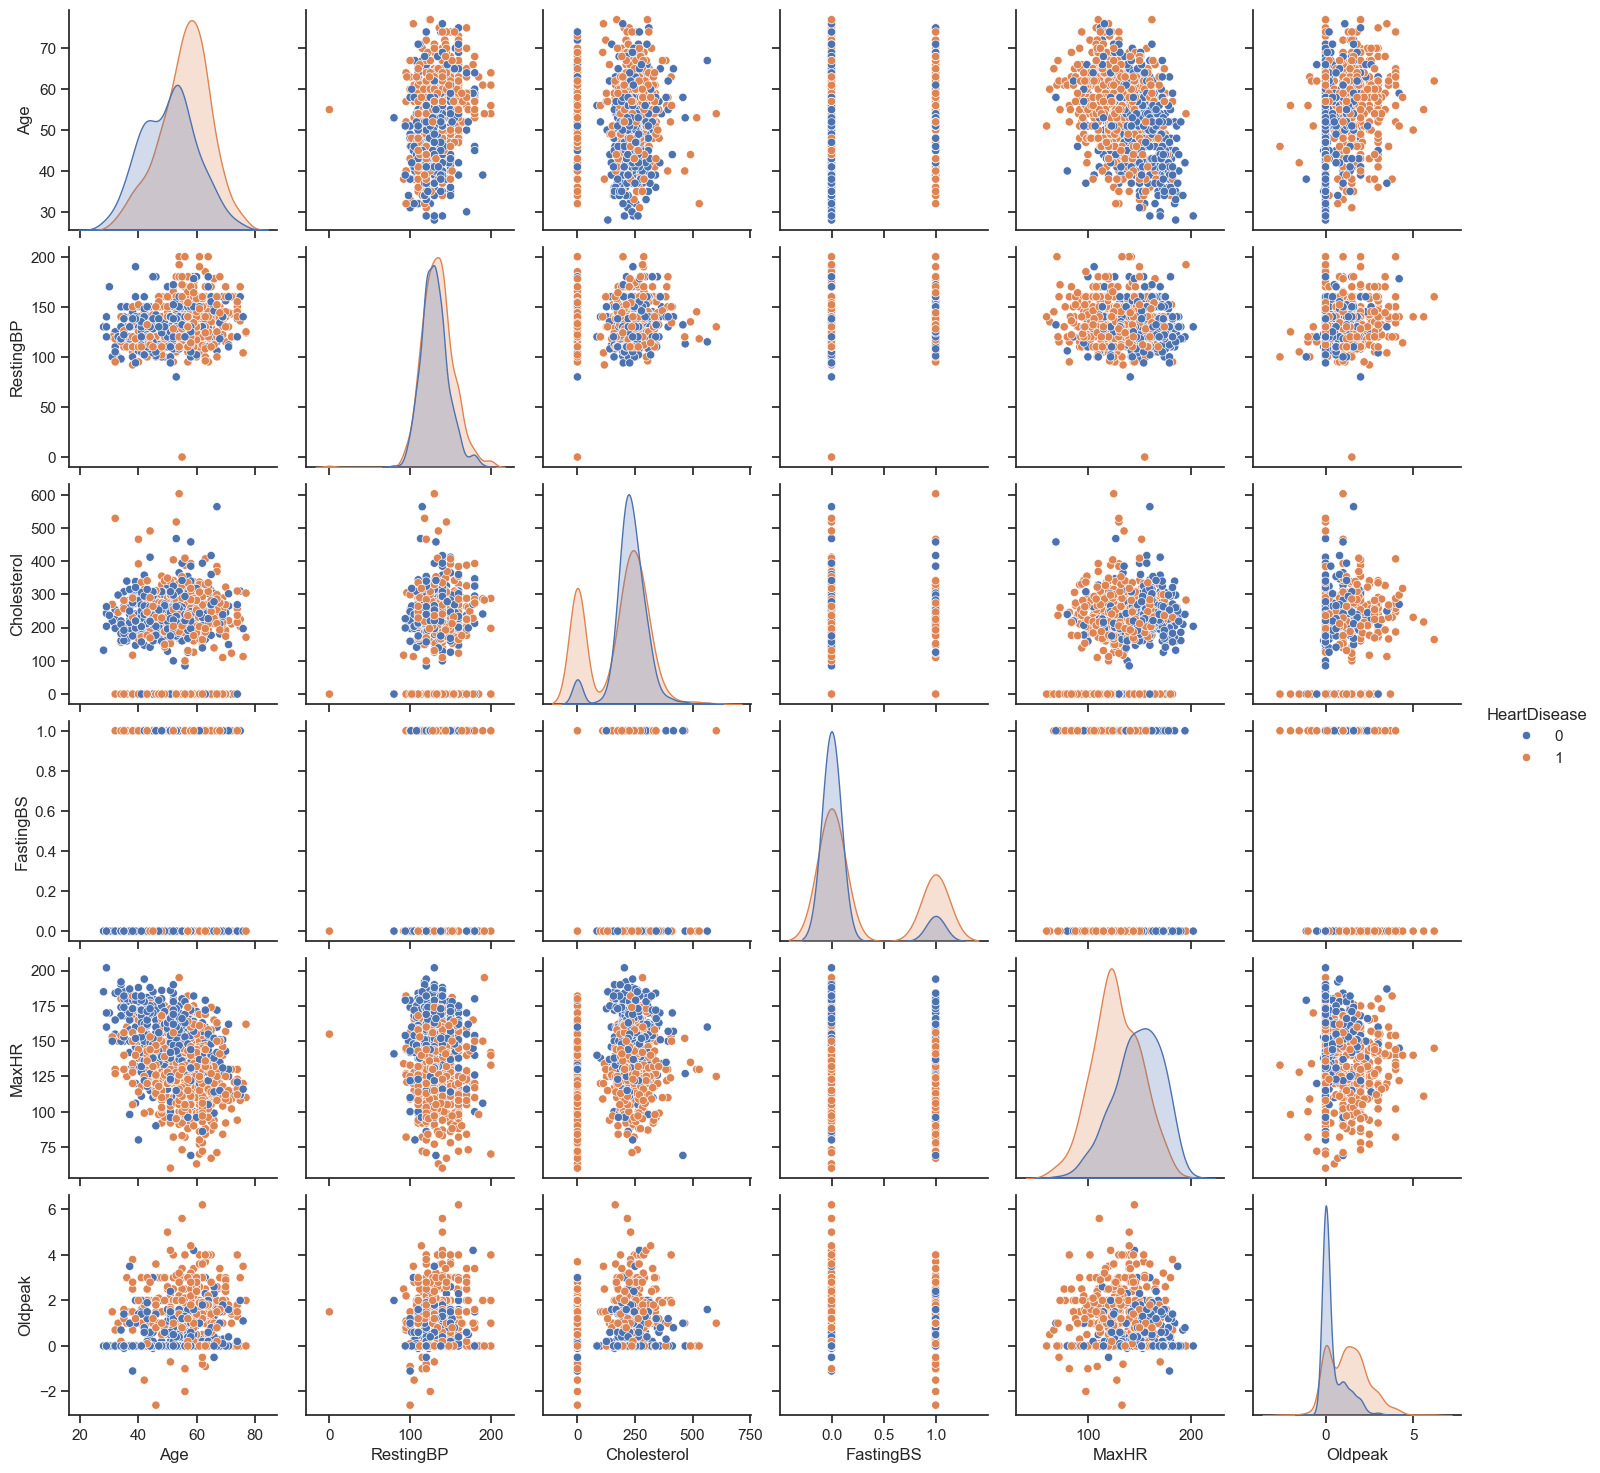

In [15]:
sns.pairplot(train, hue="HeartDisease")

In [16]:
train['HeartDisease'].unique()

array([0, 1], dtype=int64)

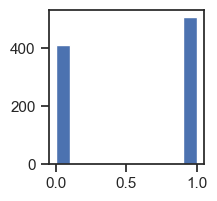

In [17]:
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['HeartDisease'])
plt.show()

In [18]:
train['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [19]:
total = train.shape[0]
class_0, class_1 = train['HeartDisease'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 55.34%, а класс 1 составляет 44.66%.


Вывод. Дисбаланс классов присутствует, но является приемлемым.

In [20]:
train.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

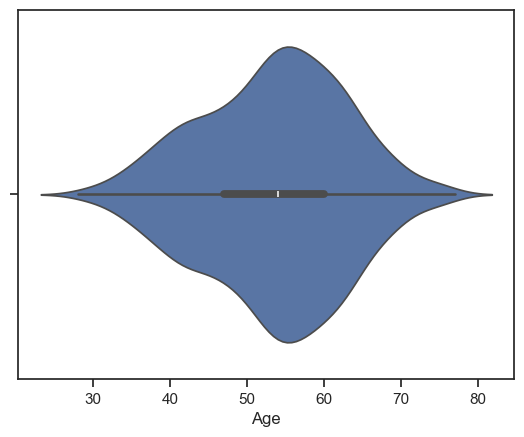

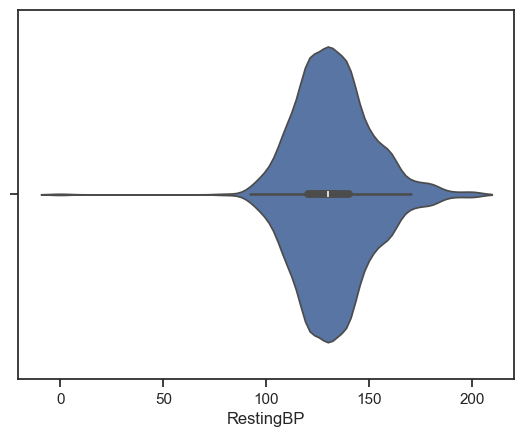

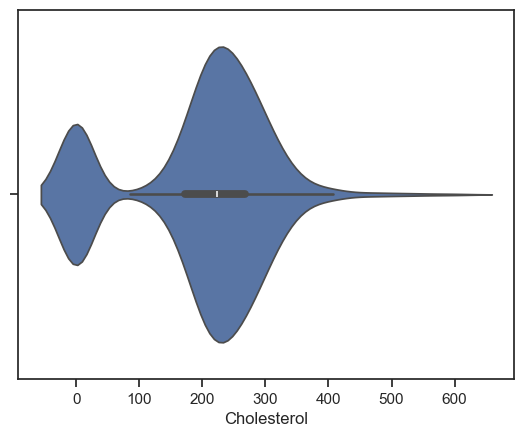

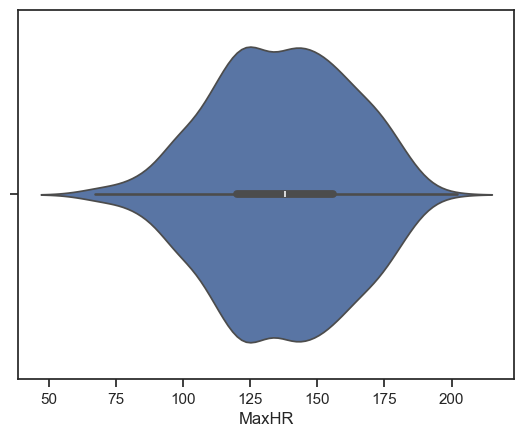

In [21]:
for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']:
    sns.violinplot(x=train[col])
    plt.show()

3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [22]:
train.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Для построения моделей будем использовать все признаки

In [23]:
train = train.copy()
train['dataset'] = 'TRAIN'

In [24]:
join_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'dataset']

In [25]:
data_all = pd.concat([train[join_cols]])

In [26]:
assert data_all.shape[0] == train.shape[0]

In [27]:
data_all.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,dataset
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,TRAIN
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,TRAIN
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,TRAIN
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,TRAIN
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,TRAIN


In [28]:
scale_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [29]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_all[scale_cols])

In [30]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_all[new_col_name] = sc1_data[:,i]

In [31]:
data_all.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,dataset,Age_scaled,RestingBP_scaled,Cholesterol_scaled,FastingBS_scaled,MaxHR_scaled,Oldpeak_scaled
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,TRAIN,0.244898,0.70,0.479270,0.0,0.788732,0.295455
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,TRAIN,0.428571,0.80,0.298507,0.0,0.676056,0.409091
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,TRAIN,0.183673,0.65,0.469320,0.0,0.267606,0.295455
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,TRAIN,0.408163,0.69,0.354892,0.0,0.338028,0.465909
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,TRAIN,0.530612,0.75,0.323383,0.0,0.436620,0.295455


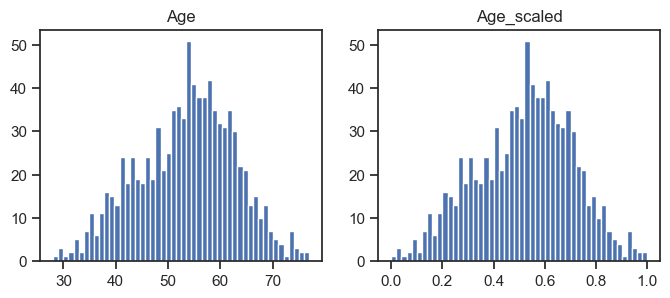

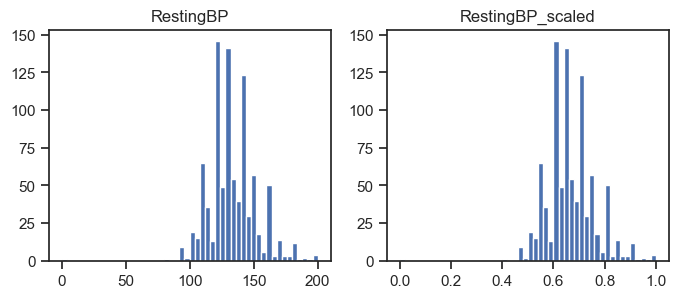

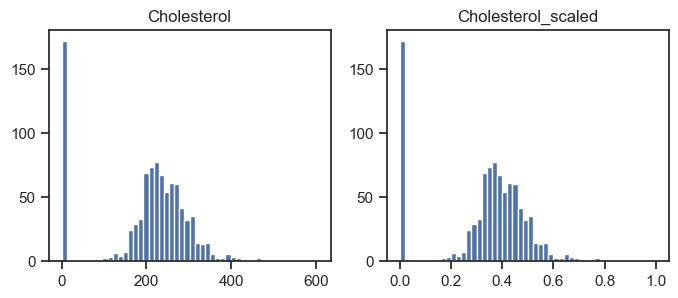

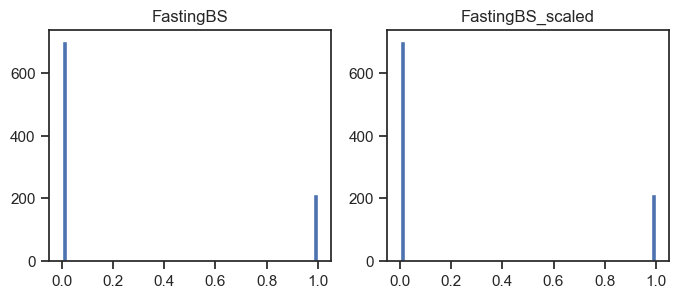

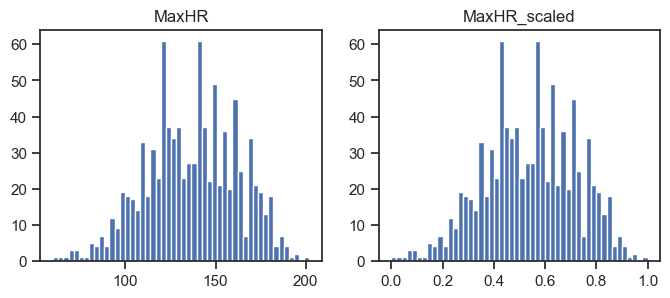

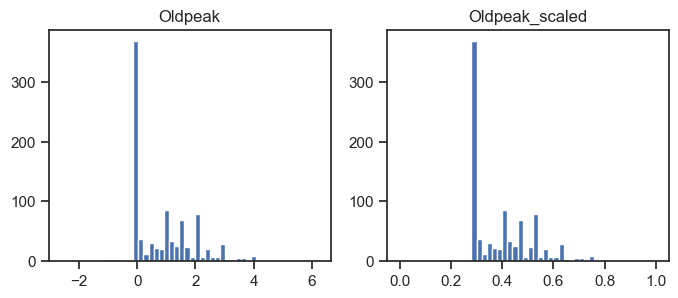

In [32]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_all[col], 50)
    ax[1].hist(data_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения

In [33]:
corr_cols_1 = scale_cols + ['HeartDisease']
corr_cols_1

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [34]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['HeartDisease']
corr_cols_2

['Age_scaled',
 'RestingBP_scaled',
 'Cholesterol_scaled',
 'FastingBS_scaled',
 'MaxHR_scaled',
 'Oldpeak_scaled',
 'HeartDisease']

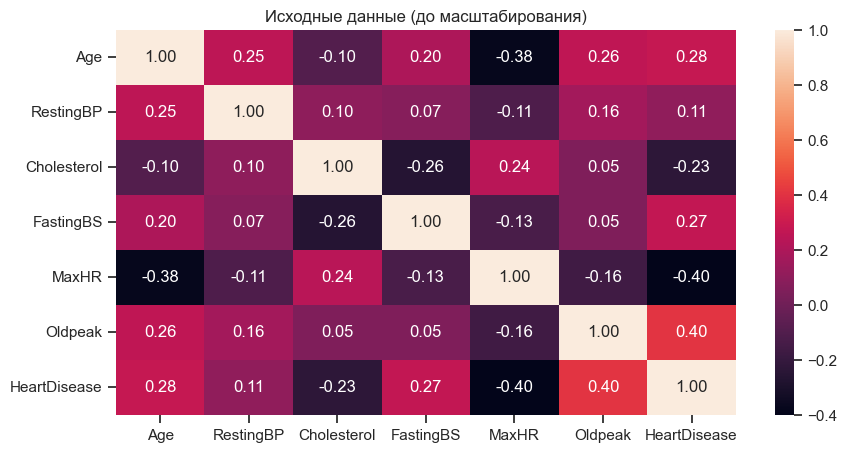

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_all[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

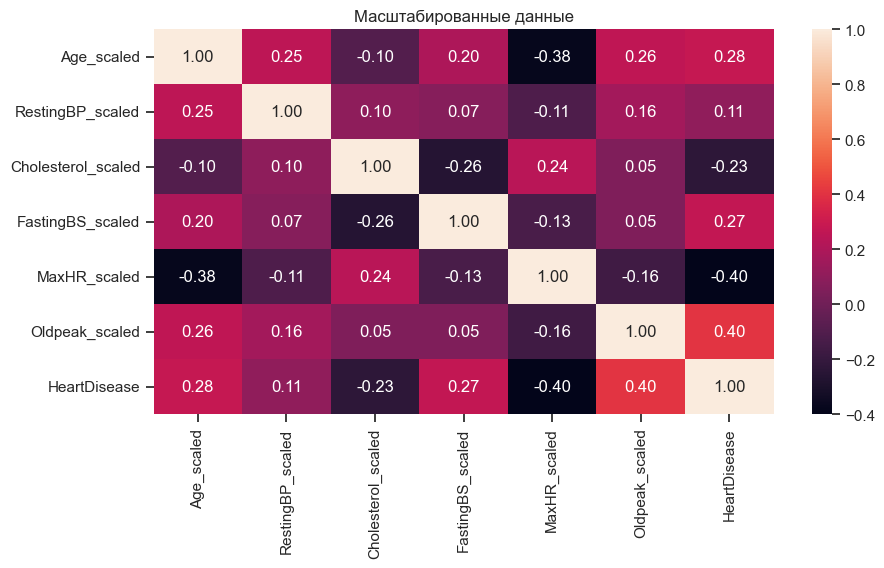

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_all[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

Корреляционные матрицы для исходных и масштабированных данных совпадают.
Целевой признак классификации "HeartDisease" наиболее сильно коррелирует с Oldpeak (0.4), и возрастом (0.28). Эти признаки обязательно следует оставить в модели классификации.
Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

5. Выбор метрик для последующей оценки качества моделей

Выбор метрик для последующей оценки качества моделей.
В качестве метрик для решения задачи классификации будем использовать:
Метрики, формируемые на основе матрицы ошибок:

Метрика precision:
Можно переводить как точность.

precision=TPTP+FP
Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция precision_score.

Метрика recall (полнота):
recall=TPTP+FN
Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция recall_score.

Метрика F1
-мера
Для того, чтобы объединить precision и recall в единую метрику используется Fβ
-мера, которая вычисляется как среднее гармоническое от precision и recall:

Fβ=(1+β2)⋅precision⋅recallprecision+recall
где β
 определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при β=1
:

F1=2⋅precision⋅recallprecision+recall
Для вычисления используется функция f1_score.

Метрика ROC AUC
Основана на вычислении следующих характеристик:

TPR=TPTP+FN
 - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

FPR=FPFP+TN
 - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

Сохранение и визуализация метрик

In [37]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

6. Выбор наиболее подходящих моделей для решения задачи классификации 

Для задачи классификации будем использовать следующие модели:

Логистическая регрессия
Метод ближайших соседей
Машина опорных векторов
Решающее дерево
Случайный лес
Градиентный бустинг

7. Формирование обучающей и тестовой выборок на основе исходного набора данных

In [38]:
train_data_all = data_all[data_all['dataset']=='TRAIN']
train_data_all.shape

(918, 19)

In [39]:
task_clas_cols = ['Age_scaled',
 'RestingBP_scaled',
 'Cholesterol_scaled',
 'FastingBS_scaled',
 'MaxHR_scaled',
 'Oldpeak_scaled']

In [40]:
clas_X_train = train_data_all[task_clas_cols]
clas_Y_train = train_data_all['HeartDisease']
clas_X_train.shape, clas_Y_train.shape

((918, 6), (918,))

8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

Решение задачи классификации

In [41]:
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [42]:
clasMetricLogger = MetricLogger()

In [43]:
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

def clas_train_model(model_name, model, clas_X_train, clas_Y_train, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)

    Y_pred = model.predict(clas_X_train)

    Y_pred_proba_temp = model.predict_proba(clas_X_train)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(clas_Y_train, Y_pred)
    recall = recall_score(clas_Y_train, Y_pred)
    f1 = f1_score(clas_Y_train, Y_pred)
    roc_auc = roc_auc_score(clas_Y_train, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))   
    draw_roc_curve(clas_Y_train, Y_pred_proba, ax[0])

    cm = confusion_matrix(clas_Y_train, Y_pred)
    disp = ConfusionMatrixDisplay.from_estimator(model, clas_X_train, clas_Y_train, display_labels=['0','1'], cmap=plt.cm.Blues, normalize='true', ax=ax[1])
    
    fig.suptitle(model_name)
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


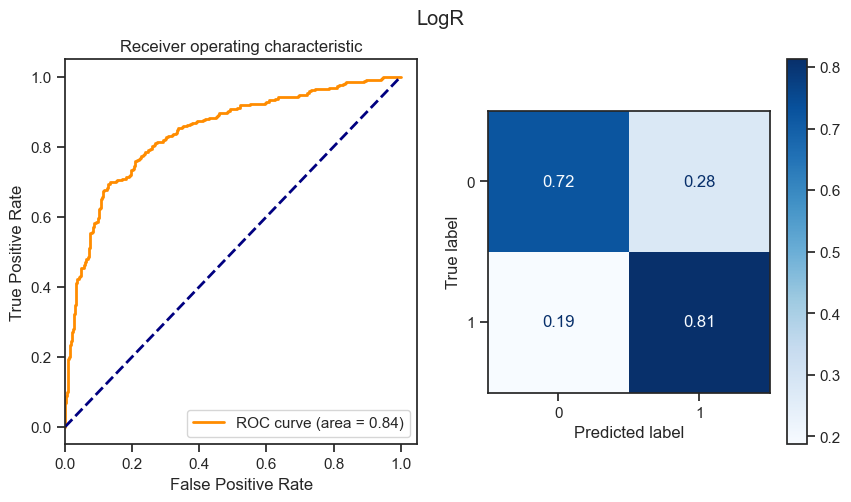

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


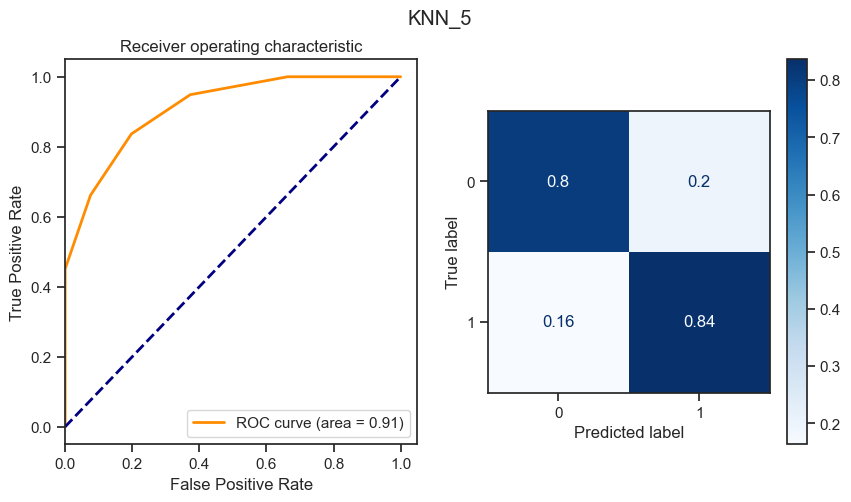

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


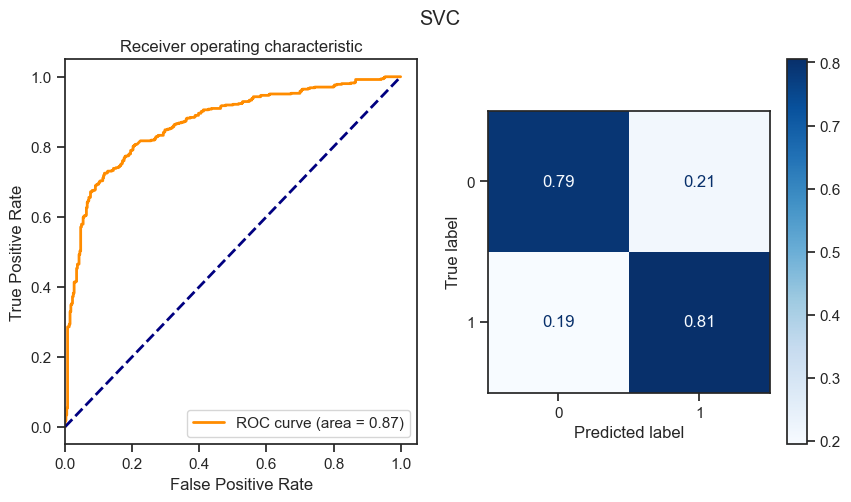

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


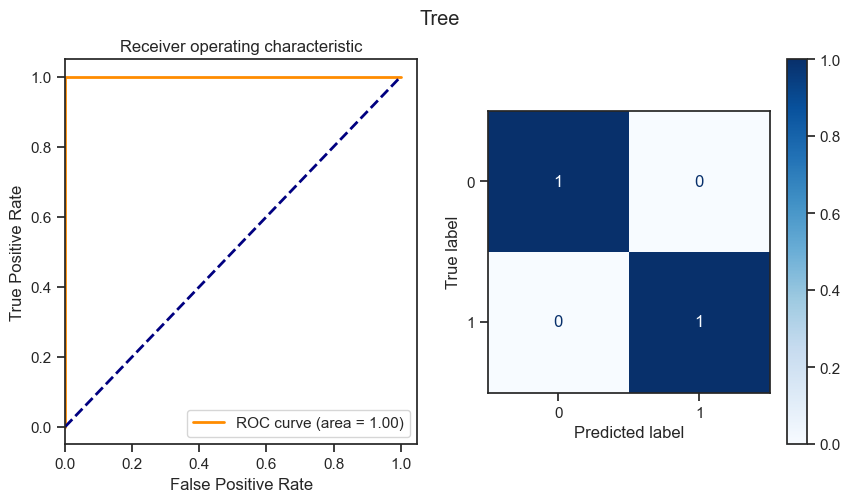

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


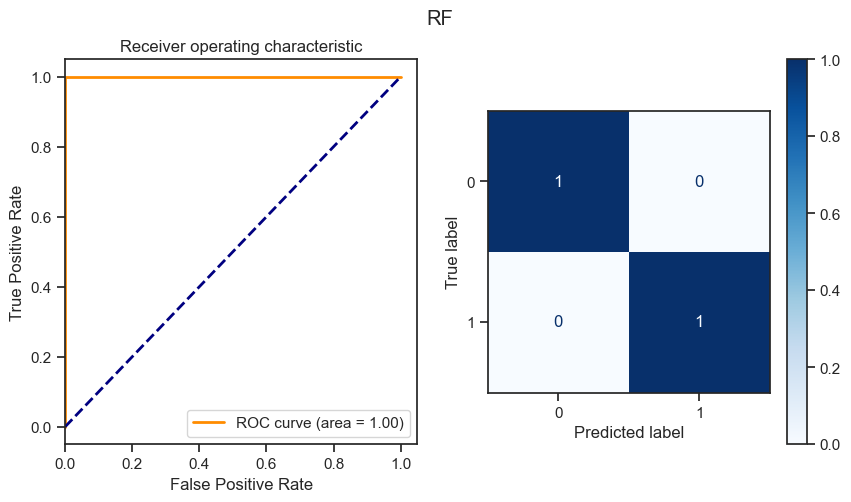

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


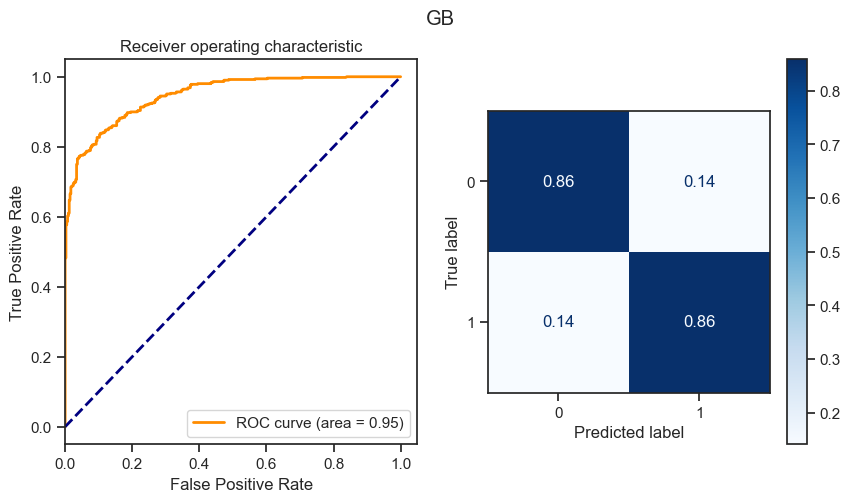

In [45]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clas_X_train, clas_Y_train, clasMetricLogger)

9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [46]:
clas_X_train.shape

(918, 6)

In [47]:
n_range_list = list(range(0,750,50))
n_range_list[0] = 1

In [48]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
         650, 700])}]

In [49]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(clas_X_train, clas_Y_train)

CPU times: total: 1.64 s
Wall time: 1.11 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([  1,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650, 700])}],
             scoring='roc_auc')

In [50]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=50)

In [51]:
clf_gs.best_params_

{'n_neighbors': 50}

In [52]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'50'

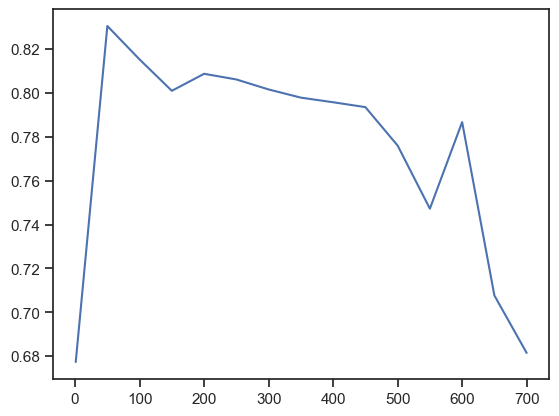

In [53]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [54]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


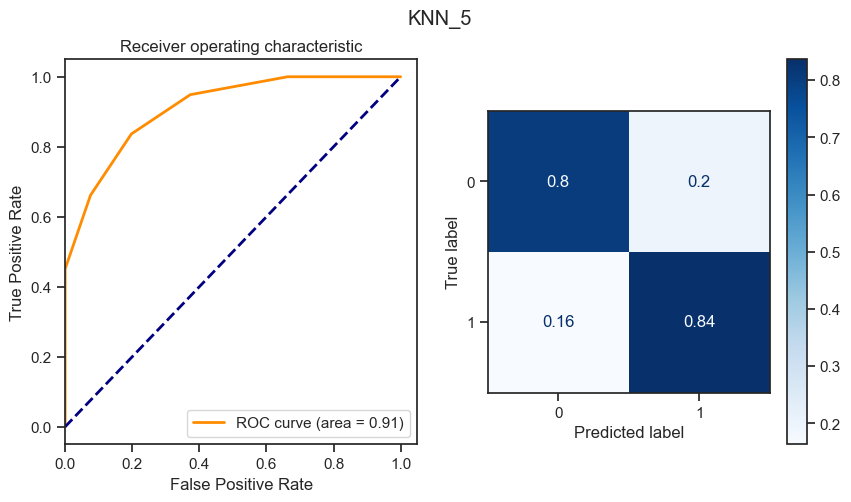

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9668\104349438.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)


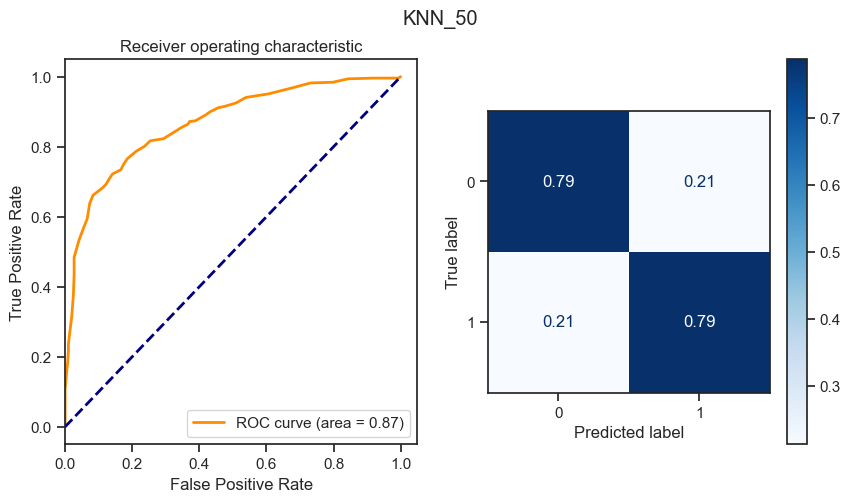

In [55]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clas_X_train, clas_Y_train, clasMetricLogger)

11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [56]:
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

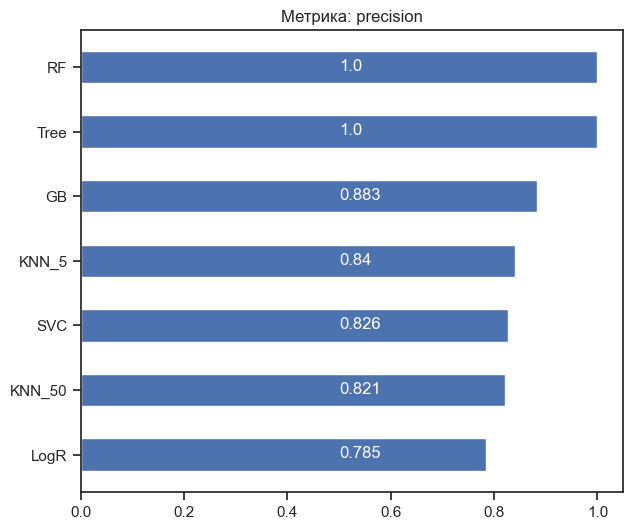

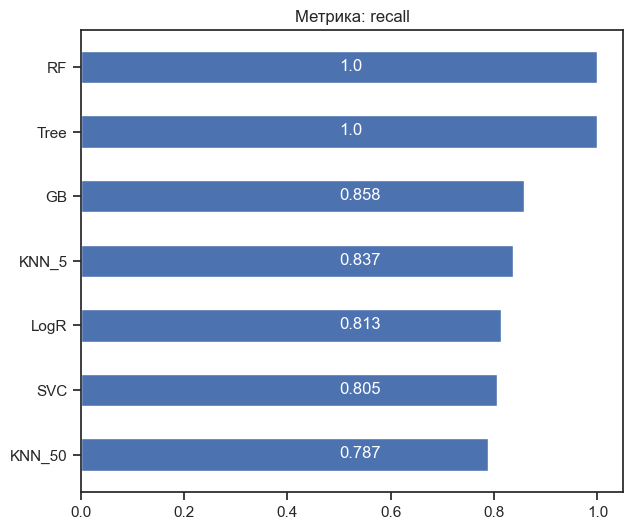

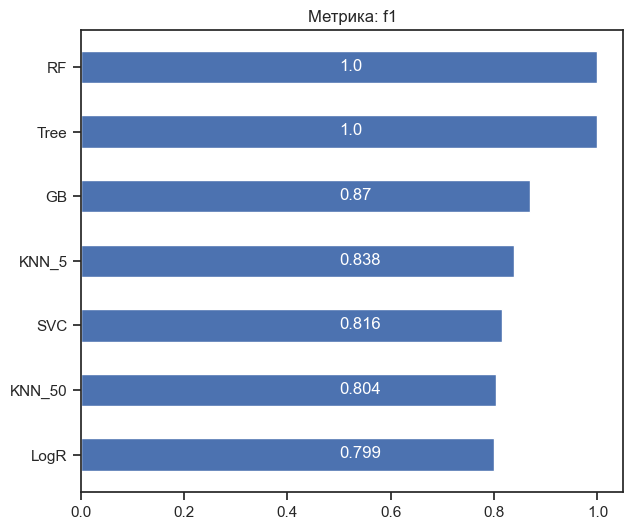

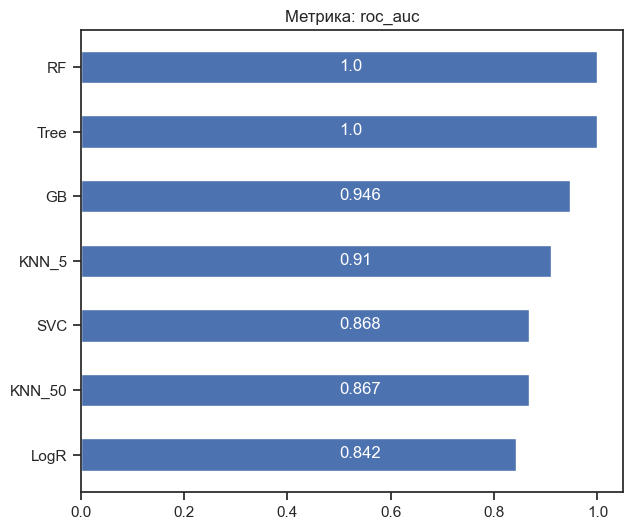

In [57]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Вывод: на основании четырех метрик из четырех используемых, лучшими оказались модели случайного леса и дерево.

In [66]:
pip install voila

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [67]:
from sklearn.ensemble import RandomForestRegressor
from ipywidgets import interact, fixed
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [75]:
clas_X_train = train_data_all[task_clas_cols]
clas_Y_train = train_data_all['HeartDisease']
clas_models = {'RandomForest': RandomForestClassifier()}
clasMetricLogger = MetricLogger()

def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    lw = 2
    ax.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc="lower right")

def clas_train_model_interactive(model_name, model, clas_X_train, clas_Y_train, clasMetricLogger, n_neighbors=50, max_depth=None):
    if max_depth is not None:
        model.set_params(max_depth=max_depth)
    model.set_params(n_estimators=n_neighbors)
    model.fit(clas_X_train, clas_Y_train)

    Y_pred = model.predict(clas_X_train)
    Y_pred_proba_temp = model.predict_proba(clas_X_train)
    Y_pred_proba = Y_pred_proba_temp[:, 1]

    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    draw_roc_curve(clas_Y_train, Y_pred_proba, ax[0])

    cm = confusion_matrix(clas_Y_train, Y_pred)
    disp = ConfusionMatrixDisplay.from_estimator(model, clas_X_train, clas_Y_train, display_labels=['0', '1'], cmap=plt.cm.Blues, normalize='true', ax=ax[1])

    fig.suptitle(f'{model_name} (n_neighbors: {n_neighbors}, max_depth: {max_depth})')
    plt.show()

interact(clas_train_model_interactive, 
         model_name=clas_models.keys(),
         model=clas_models.values(),
         clas_X_train=fixed(clas_X_train),
         clas_Y_train=fixed(clas_Y_train),
         clasMetricLogger=fixed(clasMetricLogger),
         n_neighbors=(1, 100, 1),
         max_depth=(1, 20, 1))

interactive(children=(Dropdown(description='model_name', options=('RandomForest',), value='RandomForest'), Dro…

<function __main__.clas_train_model_interactive(model_name, model, clas_X_train, clas_Y_train, clasMetricLogger, n_neighbors=50, max_depth=None)>